# **K-Nearest Neighbors**

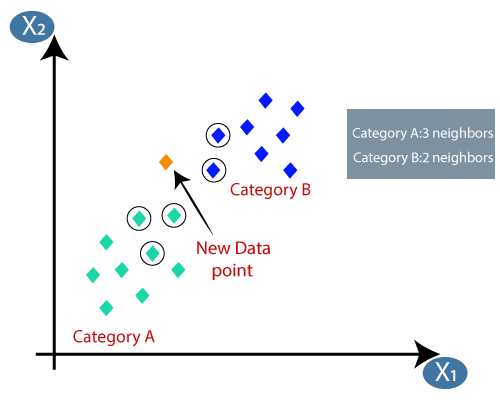



## ***IMPORTING LIBRARIES***

In [ ]:
import numpy as np
import pandas as pd

## ***LOADING THE DATASET***

In [ ]:
data = pd.read_csv("income.csv")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## ***SUMMARIZING THE DATASET***

In [ ]:
print(data.shape)
print(data.head())

(48842, 15)
   age  workclass  fnlwgt  ... hours-per-week  native-country income
0   25    Private  226802  ...             40   United-States  <=50K
1   38    Private   89814  ...             50   United-States  <=50K
2   28  Local-gov  336951  ...             40   United-States   >50K
3   44    Private  160323  ...             40   United-States   >50K
4   18          ?  103497  ...             30   United-States  <=50K

[5 rows x 15 columns]


## ***PRE-PROCESSING THE DATASET***

In [ ]:
data = data.drop(["workclass","fnlwgt","education","marital-status","occupation","relationship","race","gender","capital-loss","native-country"],axis = 1)

In [ ]:
data

,age,educational-num,capital-gain,hours-per-week,income
0,25,7,0,40,<=50K
1,38,9,0,50,<=50K
2,28,12,0,40,>50K
3,44,10,7688,40,>50K
4,18,10,0,30,<=50K
...,...,...,...,...,...
48837,27,12,0,38,<=50K
48838,40,9,0,40,>50K
48839,58,9,0,40,<=50K
48840,22,9,0,20,<=50K


## ***MAPPING THE INCOME COLUMN TO BINARY VALUE***

In [ ]:
data["income"] = data["income"].map({"<=50K" : 0 ,">50K" : 1 }).astype(int)

In [ ]:
data

,age,educational-num,capital-gain,hours-per-week,income
0,25,7,0,40,0
1,38,9,0,50,0
2,28,12,0,40,1
3,44,10,7688,40,1
4,18,10,0,30,0
...,...,...,...,...,...
48837,27,12,0,38,0
48838,40,9,0,40,1
48839,58,9,0,40,0
48840,22,9,0,20,0


## ***SEGREGATING THE DATASET INTO INPUT AND OUTPUT***

In [ ]:
input  = data.iloc[:,:-1].values
print(input)

output = data.iloc[:,-1:].values
print(output)

[[   25     7     0    40]
 [   38     9     0    50]
 [   28    12     0    40]
 ...
 [   58     9     0    40]
 [   22     9     0    20]
 [   52     9 15024    40]]
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]


## ***FEATURE SCALING***

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling      = StandardScaler()
scaled_input = scaling.fit_transform(input)

scaled_input

array([[-0.99512893, -1.19725891, -0.14480353, -0.03408696],
       [-0.04694151, -0.41933527, -0.14480353,  0.77292975],
       [-0.77631645,  0.74755018, -0.14480353, -0.03408696],
       ...,
       [ 1.41180837, -0.41933527, -0.14480353, -0.03408696],
       [-1.21394141, -0.41933527, -0.14480353, -1.64812038],
       [ 0.97418341, -0.41933527,  1.87131501, -0.03408696]])

## ***SPLITTING THE DATASET INTO TRAIN AND TEST DATA***

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_input,output)

## ***FINDING THE BEST K-VALUE***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

error = []

# CALCULATING ERROR FOR K VALUES BETWEEN 1 AND 50
for i in range(1,51):
  model = KNeighborsClassifier(i)
  model.fit(x_train,y_train)
  pred  = model.predict(x_test)
  error.append(np.mean(pred != y_test))

error

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.36843987608193096,
 0.30073915091680103,
 0.35591842534606055,
 0.31202967937694187,
 0.33762437359297526,
 0.3097376172083418,
 0.3294748192157308,
 0.31224190735551594,
 0.32595183477140116,
 0.3117325602069381,
 0.3230230886670789,
 0.31113832186693074,
 0.3223439591356419,
 0.3110534306755011,
 0.31648646692699745,
 0.31007718197406037,
 0.31742027003272333,
 0.30994984518691593,
 0.3172504876498641,
 0.31109587627121593,
 0.31797206277701595,
 0.3109685394840715,
 0.3167411405012863,
 0.31007718197406037,
 0.3161469021612789,
 0.3110534306755011,
 0.31427929594982706,
 0.3105865291226381,
 0.31563755501270113,
 0.30948294363405293,
 0.31453396952411594,
 0.31088364829264187,
 0.31449152392840113,
 0.3105016379312085,
 0.3155951094169863,
 0.31067142031406775,
 0.3139821767798233,
 0.3096527260169122,
 0.31631668454413814,
 0.3086340317197566,
 0.3132606016526715,
 0.3107987571012122,
 0.31538288143841225,
 0.3116052234197937,
 0.31415195916268257,
 0.3093556068469085,
 0.313812

Text(0, 0.5, 'ERROR RATE')

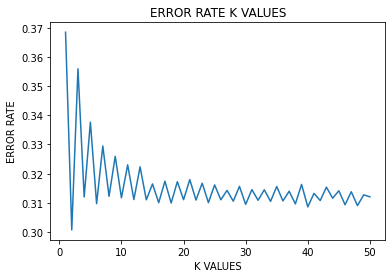

In [ ]:
plt.plot(range(1,51),error)
plt.title("ERROR RATE K VALUES")
plt.xlabel("K VALUES")
plt.ylabel("ERROR RATE")

## ***TRAINING THE DATASET***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_Model = KNeighborsClassifier(n_neighbors = 6)

KNN_Model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

## ***PREDICTING THE RESULT USING THE TRAINED MODEL***

In [ ]:
y_pred = KNN_Model.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

## ***CALCULATING THE ACCURACY OF THE TRAINED MODEL***

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("confusion_matrix:")
print(confusion_matrix(y_pred,y_test))
print("accuracy_score:",accuracy_score(y_pred,y_test)*100,"%")

confusion_matrix:
[[8789 1799]
 [ 481 1142]]
accuracy_score: 81.32831053967735 %


## ***PREDICTING THE OUTPUT OF SINGLE TEST DATA USING THE TRAINED MODEL***

In [ ]:
print("ACUTAL OUPUT: ",y_test[901])
print("PREDICTED OUTPUT: ")
KNN_Model.predict(np.reshape(x_test[901],(1,4)))

ACUTAL OUPUT:  [1]
PREDICTED OUTPUT: 


array([1])